In [7]:
from numpy.lib import info
from IPython.display import HTML
from IPython.display import display

from ipywidgets import interactive
import ipywidgets as widgets
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as img
from matplotlib.offsetbox import  AnnotationBbox, OffsetImage

# Tomado de https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=false; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

Para mostrar/ocultar código presione <a href="javascript:code_toggle()">aquí</a>.''')

def uniforme(v, t, R):
    velocidadAngular = v/R
    posicionX = R*math.cos(velocidadAngular * t)
    posicionY = R*math.sin(velocidadAngular * t)
    magnitud =  (posicionX**2+posicionY**2)**(1/2)
    aceleracionMagnitud = (v**2/R)
    aceleracionVector = [-5*aceleracionMagnitud*posicionX/magnitud, -5*aceleracionMagnitud*posicionY/magnitud]
    velocidadVector = [-v*posicionY/R, v*posicionX/R]
    return posicionX, posicionY, aceleracionVector, velocidadVector

def noUniforme(at, t, R):
    v = at*t
    velocidadAngular = v/R
    posicionX = R*math.cos((at * t**2)/R)
    posicionY = R*math.sin((at * t**2)/R)
    magnitud =  (posicionX**2+posicionY**2)**(1/2)
    aceleracionMagnitud = (v**2/R)
    aceleracionVector = [-5*aceleracionMagnitud*posicionX/magnitud, -5*aceleracionMagnitud*posicionY/magnitud]
    velocidadVector = [-10*v*math.sin((at * t**2)/R), 10*v*math.cos((at * t**2)/R)]
    return posicionX, posicionY, aceleracionVector, velocidadVector



def graficoUniforme():

    display(tag)

    def graficoInteractivoUniforme(velocidad, radio, tiempo):
        infoGrafico = uniforme(velocidad, tiempo, radio)  
        fig, ax = plt.subplots (dpi=120) 

        ax.set_xlabel('Posición x $(m)$')
        ax.set_ylabel('Posición y $(m)$')
        plt.xlim (-50, 50)
        plt.ylim (-50, 50)
        ax.add_patch(
           plt.Circle((0,0), radio, fill=False) )
           
        ax.text(40, 45, "A. Centripeta="+str(round(velocidad**2/radio))+"$m/s^2$", color = "red")
        ax.text( 40, 40, "V. Tangencial="+str(velocidad)+"$m/s$")
        ax.text( 40, 35, "V. Angular="+str(round(velocidad/radio,2))+"$rad/s$", color = "c")
        ax.arrow (infoGrafico[0], infoGrafico[1], infoGrafico[3][0], infoGrafico[3][1], head_width=3, head_length=3, fc='k', ec='k')
        ax.arrow (infoGrafico[0], infoGrafico[1], infoGrafico[2][0]/10, infoGrafico[2][1]/10, head_width=3, head_length=3, fc='red', ec='red')
        ax.arrow (0, 0, 0, velocidad/radio*25, head_width=3, head_length=3, fc='c', ec='c')

        ax.set_title('Posición partícula en movimiento circular uniforme (MCU)')  
        ax.axis ("off")
        
        image = img.imread("ejes.jpg")
        newax = fig.add_axes([1.0, 0.2, 0.4, 0.4], anchor='SW', zorder=1)
        newax.imshow(image)
        newax.axis ("off")
        plt.show()  
        return

    velEtiqueta = widgets.Label (value="Velocidad $(m/s)$:")
    velSlider = widgets.FloatSlider(min=-15, max=15, step=0.1, value=10.0)
    cajaVelocidad = widgets.HBox([velEtiqueta, velSlider])

    rEtiqueta = widgets.Label (value="Radio $(m)$:")
    rSlider = widgets.IntSlider(min=10, max=50, step=1, value=25)
    cajaRadio = widgets.HBox([rEtiqueta, rSlider])

    play = widgets.Play(value=0, min=0, max=30, step=1, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.FloatSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(graficoInteractivoUniforme, {'velocidad':velSlider,
                                                                  'radio':rSlider,
                                                                  'tiempo':tieSlider})

    display(cajaVelocidad, cajaRadio, cajaTiempo, play, salida)

def graficoNoUniforme():

    display(tag)

    def graficoInteractivoNoUniforme(aceleracion, radio, tiempo):
        infoGrafico = noUniforme(aceleracion, tiempo, radio) 
        velocidad = aceleracion * tiempo  
        fig, ax = plt.subplots (dpi=120)    
        ax.set_xlabel('Posición x $(m)$')
        ax.set_ylabel('Posición y $(m)$')
        plt.xlim (-50, 50)
        plt.ylim (-50, 50)
        ax.add_patch(
           plt.Circle((0,0), radio, fill=False) )

        ax.text(40, 45, "A. Centripeta="+str(round(velocidad**2/radio))+"$m/s^2$", color = "red")
        ax.text( 40, 40, "V. Tangencial="+str(round(velocidad,2))+"$m/s$")
        ax.text( 40, 35, "V. Angular="+str(round(velocidad/radio,2))+"$rad/s$", color = "c")
        ax.arrow (infoGrafico[0], infoGrafico[1], infoGrafico[3][0]/10, infoGrafico[3][1]/10, head_width=3, head_length=3, fc='k', ec='k')
        ax.arrow (infoGrafico[0], infoGrafico[1], infoGrafico[2][0]/10, infoGrafico[2][1]/10, head_width=3, head_length=3, fc='red', ec='red')
        ax.arrow (0, 0, 0, velocidad/radio*25, head_width=3, head_length=3, fc='c', ec='c')

        ax.set_title('Posición partícula en movimiento circular uniforme acelerado (MCUA)')  
        ax.axis ("off")
        
        image = img.imread("ejes.jpg")
        newax = fig.add_axes([1.0, 0.2, 0.4, 0.4], anchor='SW', zorder=1)
        newax.imshow(image)
        newax.axis ("off")
        
        plt.show()  
        return

    acelEtiqueta = widgets.Label (value="Aceleracion $(m/s^2)$:")
    acelSlider = widgets.FloatSlider(min=-1, max=1, step=0.01, value=0.5)
    cajaAceleracion = widgets.HBox([acelEtiqueta, acelSlider])

    rEtiqueta = widgets.Label (value="Radio $(m)$:")
    rSlider = widgets.IntSlider(min=5, max=50, step=1, value=25)
    cajaRadio = widgets.HBox([rEtiqueta, rSlider])

    play = widgets.Play(value=0, min=0, max=30, step=1, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.FloatSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(graficoInteractivoNoUniforme, {'aceleracion':acelSlider,
                                                                  'radio':rSlider,
                                                                  'tiempo':tieSlider})

    display(cajaAceleracion, cajaRadio, cajaTiempo, play, salida)


def Relativo ():

    display(tag)

    def graficoVelRelativa (v1, v2, observador):
        fig, ax = plt.subplots (dpi=120)    
        ax.set_xlabel('Posición x $(m)$')
        ax.set_ylabel('Posición y $(m)$')

        image = img.imread("Relativo.jpg")

        if observador == 0:
            vMujer = v1 + v2
            vTren = v2
            ax.arrow (180, 150, vMujer, 0, head_width=3, head_length=3, fc='k', ec='k')
            ax.text(185+vMujer, 170, "V. Mujer="+str(vMujer)+"$m/s$")
            ax.arrow (270, 50, vTren, 0, head_width=3, head_length=3, fc='k', ec='k')
            ax.text(275+vTren, 70, "V. Tren="+str(vTren)+"$m/s$")

        elif observador == 1:
            vCiclista = -v1 - v2
            vTren = -v1
            ax.arrow (170, 250, vCiclista, 0, head_width=3, head_length=3, fc='k', ec='k')
            ax.text(175+vCiclista, 270, "V. Ciclista="+str(vCiclista)+"$m/s$")
            ax.arrow (270, 50, vTren, 0, head_width=3, head_length=3, fc='k', ec='k')
            ax.text(275+vTren, 70, "V. Tren="+str(vTren)+"$m/s$")

        else:
            vMujer = v1
            vCiclista = -v2
            ax.arrow (180, 150, vMujer, 0, head_width=3, head_length=3, fc='k', ec='k')
            ax.text(185+vMujer, 170, "V. Mujer="+str(vMujer)+"$m/s$")
            ax.arrow (170, 250, vCiclista, 0, head_width=3, head_length=3, fc='k', ec='k')
            ax.text(175+vCiclista, 270, "V. Ciclista="+str(vCiclista)+"$m/s$")

        ax.set_title('Movimiento Relativo')  
        ax.axis ("off")
        plt.imshow(image)
        return  

    v1Etiqueta = widgets.Label (value="Velocidad de la Mujer $(m/s)$:")
    v1Slider = widgets.FloatSlider(min=-10, max=10, step=1, value=5)
    cajaV1 = widgets.HBox([v1Etiqueta, v1Slider])

    v2Etiqueta = widgets.Label (value="Velocidad del Tren $(m/s)$:")
    v2Slider = widgets.FloatSlider(min=-10, max=10, step=1, value=5)
    cajaV2 = widgets.HBox([v2Etiqueta, v2Slider])

    observador = widgets.Dropdown(
        options=[('Ciclista',0), ('Mujer',1), ('Tren',2)],
        value=0,
        description='Velocidad relativa respecto a:',
        disabled=False,
    )


    salida = widgets.interactive_output(graficoVelRelativa, {'v1':v1Slider,
                                                            'v2':v2Slider,
                                                            'observador':observador})

    display(cajaV1, cajaV2, observador, salida)




def GravedadPlanetas():

    display(tag)
    
    def Gravedad(planeta):
        
        constanteGravitacionUniversal = 6.6742 * 10**(-11)
        
        listaMasas = [3.301*10**23, 4.8673*10**24, 5.9722*10**24, 6.4169*10**23, 
                      1.8981*10**27, 5.6832*10**26, 8.681*10**25, 1.0241*10**26]
                      
        listaRadios = [2439.7, 6052, 6378, 3396, 
                       71400, 60330, 25559, 24764]
        
        gravedad = constanteGravitacionUniversal * listaMasas[planeta] / (listaRadios[planeta]*10**3)**2
        
        gravedad = round (gravedad,2)
        
        fig, ax = plt.subplots (dpi=120)    

        
        ax.text(1, 225, "Masa = " + str (format (listaMasas[planeta], '.4E')) + " $kg$")
        ax.text(1, 240, "Radio = " + str (listaRadios[planeta]) + " $km$")
        ax.text(1, 255, "Gravedad = " + str(gravedad) + " $m/s^2$")
        
        listaImagen = ['Mercurio.jpg', 'Venus.jpg', 'Tierra.jpg', 'Marte.jpg',
                 'Júpiter.jpg', 'Saturno.jpg', 'Urano.jpg', 'Neptuno.jpg']
        
        image = img.imread(listaImagen[planeta])
        plt.imshow(image)
        
        ax.axis ("off")
        
        plt.show()
        
        
        
    
    
    planeta = widgets.Dropdown(
        options=[('Mercurio',0), ('Venus',1), ('Tierra',2), ('Marte',3), 
                 ('Júpiter',4), ('Saturno',5), ('Urano',6), ('Neptuno',7)],
        value=2,
        description='Planeta:',
        disabled=False,
    )

    salida = widgets.interactive_output(Gravedad, {'planeta':planeta})
    
    
    display (planeta, salida)
    
    
    
    

def GravitacionUniversal():
    
    display(tag)
    
    def GraficoInteractivoDinámica(masa1, masa2, radio):
       
        constanteGravitacionUniversal = 6.6742 * 10**(-11)
        
        fuerza = constanteGravitacionUniversal * masa1 * masa2 / (radio**2*10**15)
        
        fuerza = round (fuerza, 2)
    
        fig, ax = plt.subplots (dpi=120)    
        plt.xlim (0, 20)
        plt.ylim (0, 10)

        
        ax.add_patch(
           plt.Circle((5, 5), masa1/(3*10**20), color='c') )
        
        ax.add_patch(
           plt.Circle((5+radio/(10**7), 5), masa2/(3*10**20), color='salmon') )   
        
        ax.arrow(5, 5, radio/(10**7), 0, head_width=0.35, head_length=0, fc='k', ec='k')
        ax.arrow(5+radio/(10**7), 5, -radio/(10**7), 0, head_width=0.35, head_length=0, fc='k', ec='k')
        ax.text(3.5+radio/(10**7)/2, 8, "F = " + str(fuerza) + " $PN$")
        
        ax.set_title('Ley de Gravitación Universal')  
                
        
        ax.axis ("off")

        plt.show()  
        return

    masa1Etiqueta = widgets.Label (value="Masa 1 $(kg)$:")
    masa1Slider = widgets.FloatSlider(min=4e20, max=8e20, step=1e10, readout_format='.2e')
    cajaMasa1 = widgets.HBox([masa1Etiqueta, masa1Slider])
    
    masa2Etiqueta = widgets.Label (value="Masa $(kg)$:")
    masa2Slider = widgets.FloatSlider(min=4e20, max=8e20, step=1e10, readout_format='.2e')
    cajamasa2 = widgets.HBox([masa2Etiqueta, masa2Slider])

    radioEtiqueta = widgets.Label (value="Radio $(m)$:")
    radioSlider = widgets.FloatSlider(min=6e7, max=12e7, step=1e6, readout_format='.2e')
    cajaradio = widgets.HBox([radioEtiqueta, radioSlider])
    
    salida = widgets.interactive_output(GraficoInteractivoDinámica, {'masa1':masa1Slider,
                                                                    'masa2':masa2Slider,
                                                                    'radio':radioSlider})

    display(cajaMasa1, cajamasa2, cajaradio, salida)

# Movimiento circular uniforme

La rapidez en un movimiento circular uniforme tiene la caracteristica de ser constante. A pesar de esto cuando se le realiza un análisis vectorial podemos darnos cuenta que la velocidad no es constante, esta varía en la dirección debido a una fuerza y aceleración en dirección radial. 

Podemos afirmar tambien que la rapidez angular, es decir, las vueltas que da por unidad de tiempo, es constante y es perpendicular al ángulo y radio de la trayectoria. como se muestra en la siguiente imagen:


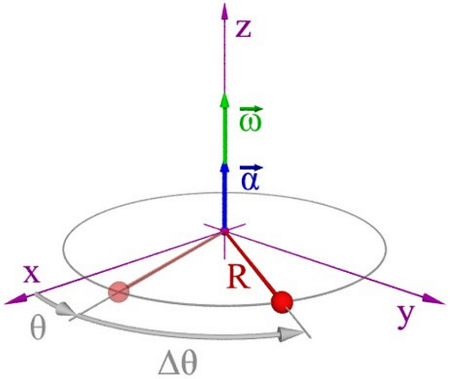

La aceleración centrípeta de la partícula en este sistema se encuentra con la ecuacion:

$$
\overrightarrow{a_{cen}} = -\dfrac{\overrightarrow{v^2}}{r}
$$

Donde el r es el radio de rotacion.

La magnitud de velocidad tangencial se puede determinar en función de el periodo:

$$
v_{tan} = \dfrac{2\pi r}{T}
$$

O también en función de la velocidad angular y el radio, con la forma:

$$
\overrightarrow{v_{tan}} = \overrightarrow{\omega} \times \overrightarrow{r}
$$

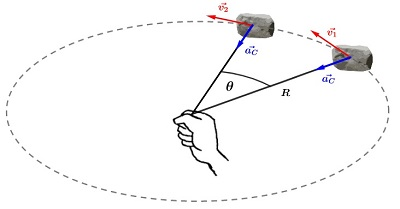

Podemos ver en la siguiente animación la forma de aceleración y velocidad en función del periodo.

In [8]:
graficoUniforme()

Play(value=0, max=30)

Output()

# Movimiento circular no uniforme

A diferencia de movimiento circular unforme, la velocidad tangencial no tiene que ser necesariamente constante. Podemos entonces asumir que sobre la partícula que experimenta este tipo de movimientos tendrá una aceleración tanto radial debida la velocidad tengencial instantanea y una aceleración en dirección paralela a la velocidad instantanea.

Es por esto que entonces tendremos un nuevo conjunto de ecuaciones que son las siguientes:

$$
v = a t
$$

$$
a_t = \dfrac{dv}{dt}
$$

$$
a_r = \dfrac{v^2}{R}
$$

In [9]:
graficoNoUniforme()

Play(value=0, max=30)

Output()

# Movimiento Relativo

El movimiento relativo es la perspectiva que un observador tiene cuando algo se mueve a su alrededor. Un ejemplo claro de esto es cuando se está dentro de un tren y el de al lado empieza a moverse, dando la impresión que nos movemos hacia atrás.

Tomando como refencia la siguiente imagen:


<img src="Relativo.jpg">

Se define que: 

$$
v_{P|A-x} = v_{P|B-x} +v_{B|A-x}
$$

In [10]:
Relativo ()

Dropdown(description='Velocidad relativa respecto a:', options=(('Ciclista', 0), ('Mujer', 1), ('Tren', 2)), v…

Output()

# Movimiento Gravitacional

*“Una partícula del universo atrae todas las demás partículas con una fuerza directamente proporcional al producto de su masa e inversamente proporcional al cuadrado de la distancia entre ellas. La dirección de la Fuerza sigue la línea que une a las partículas.”  Issac Newton*

Por lo que se define la Ley de Gravitación Universal como:

$$
F = G\dfrac{M_1M_2}{r^2}
$$

<img src="Tierra-Luna.png">

Como se puede observar en la imagen anterior, la fuerza que ejerce la tierra sobre la luna efectuará una aceleración equivalente a $a_L$. Mientras que para el ejemplo de la manzana, se puede realizar el cálculo para obtener el valor de g.

Tomando los valores de:

Constante de Gravitación Universal: $G = 6.6742x10^{-11} \dfrac{Nm^2}{kg^2}$

Masa de la Tierra: $M_T = 5.9722x10^{24} kg$

Radio de la Tierra: $r_T = 6 378 km$

Luego se puede despreciar la altura y la masa de la manzana ya que son valores despreciables en comparativa con la masa y radio de la Tierra. Por lo que reemplazando los valores anteriores en la Ley de Gravitación universal, se obtiene que:

$$
g = 9.8 m/s^2
$$

Implementando el ejemplo anterior para diversos planetas, se obtiene:


In [11]:
GravedadPlanetas ()

Dropdown(description='Planeta:', index=2, options=(('Mercurio', 0), ('Venus', 1), ('Tierra', 2), ('Marte', 3),…

Output()

In [12]:
GravitacionUniversal ()

Output()